In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
********************
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
********************
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
********************
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
********************
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
********************
Pave    1454
Grvl       6
Name: Street, dtype: int64
********************
Grvl   

In [7]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
data.drop(columns= ["Id", "MSSubClass", "LotFrontage", "LotArea", "Street", "Alley", "Utilities", "LandContour", "LandSlope", "Condition1", "Condition2",
                   "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType",
                   "MasVnrArea", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", 
                   "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "Heating", "HeatingQC", "Electrical", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",  
                   "BsmtFullBath", "BsmtHalfBath", "KitchenQual", "Functional","FireplaceQu", "GarageYrBlt", "GarageFinish", 
                   "GarageQual", "GarageCond", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "PoolQC",
                   "Fence", "MiscFeature","MiscVal", "MoSold", "YrSold", "SaleType", "SaleCondition"], inplace = True)

In [9]:
data.describe()

,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1057.429452,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,180921.195890
std,438.705324,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,79442.502883
min,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,34900.000000
25%,795.750000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,129975.000000
50%,991.500000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,163000.000000
75%,1298.250000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,214000.000000
max,6110.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,755000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   LotShape      1460 non-null   object
 2   LotConfig     1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   BldgType      1460 non-null   object
 5   HouseStyle    1460 non-null   object
 6   TotalBsmtSF   1460 non-null   int64 
 7   CentralAir    1460 non-null   object
 8   GrLivArea     1460 non-null   int64 
 9   FullBath      1460 non-null   int64 
 10  HalfBath      1460 non-null   int64 
 11  BedroomAbvGr  1460 non-null   int64 
 12  KitchenAbvGr  1460 non-null   int64 
 13  TotRmsAbvGrd  1460 non-null   int64 
 14  Fireplaces    1460 non-null   int64 
 15  GarageType    1379 non-null   object
 16  GarageCars    1460 non-null   int64 
 17  GarageArea    1460 non-null   int64 
 18  PavedDrive    1460 non-null   object
 19  SalePr

In [11]:
data.isnull().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
CentralAir       0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageType      81
GarageCars       0
GarageArea       0
PavedDrive       0
SalePrice        0
dtype: int64

In [12]:
data.corr()

,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice
TotalBsmtSF,1.000000,0.454868,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.613581
GrLivArea,0.454868,1.000000,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.467247,0.468997,0.708624
FullBath,0.323722,0.630012,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.469672,0.405656,0.560664
HalfBath,-0.048804,0.415772,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649,0.219178,0.163549,0.284108
BedroomAbvGr,0.050450,0.521270,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570,0.086106,0.065253,0.168213
KitchenAbvGr,-0.068901,0.100063,0.133115,-0.068263,0.198597,1.000000,0.256045,-0.123936,-0.050634,-0.064433,-0.135907
TotRmsAbvGrd,0.285573,0.825489,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.362289,0.337822,0.533723
Fireplaces,0.339519,0.461679,0.243671,0.203649,0.107570,-0.123936,0.326114,1.000000,0.300789,0.269141,0.466929
GarageCars,0.434585,0.467247,0.469672,0.219178,0.086106,-0.050634,0.362289,0.300789,1.000000,0.882475,0.640409
GarageArea,0.486665,0.468997,0.405656,0.163549,0.065253,-0.064433,0.337822,0.269141,0.882475,1.000000,0.623431


In [13]:
data["priceperSF"] = data["SalePrice"] / data["GrLivArea"]
data["priceperSF"]

0       121.929825
1       143.819334
2       125.139978
3        81.537566
4       113.739763
           ...    
1455    106.253795
1456    101.302460
1457    113.888889
1458    131.841373
1459    117.436306
Name: priceperSF, Length: 1460, dtype: float64

In [14]:
data.describe()

,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice,priceperSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1057.429452,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,180921.195890,120.572878
std,438.705324,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,79442.502883,31.391081
min,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,34900.000000,28.358738
25%,795.750000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,129975.000000,99.822008
50%,991.500000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,163000.000000,120.099031
75%,1298.250000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,214000.000000,138.700041
max,6110.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,755000.000000,276.250881


In [15]:
data["Neighborhood"] = data["Neighborhood"].apply(lambda x: x.strip())
data["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [16]:
(data["GrLivArea"]/data["BedroomAbvGr"]).describe()

count    1460.000000
mean             inf
std              NaN
min       236.800000
25%       424.156250
50%       511.833333
75%       621.916667
max              inf
dtype: float64

In [17]:
data.head()


,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,TotalBsmtSF,CentralAir,GrLivArea,FullBath,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,SalePrice,priceperSF
0,RL,Reg,Inside,CollgCr,1Fam,2Story,856,Y,1710,2,...,3,1,8,0,Attchd,2,548,Y,208500,121.929825
1,RL,Reg,FR2,Veenker,1Fam,1Story,1262,Y,1262,2,...,3,1,6,1,Attchd,2,460,Y,181500,143.819334
2,RL,IR1,Inside,CollgCr,1Fam,2Story,920,Y,1786,2,...,3,1,6,1,Attchd,2,608,Y,223500,125.139978
3,RL,IR1,Corner,Crawfor,1Fam,2Story,756,Y,1717,1,...,3,1,7,1,Detchd,3,642,Y,140000,81.537566
4,RL,IR1,FR2,NoRidge,1Fam,2Story,1145,Y,2198,2,...,4,1,9,1,Attchd,3,836,Y,250000,113.739763


In [18]:
data.drop(columns = ["MSZoning", "LotShape", "LotConfig", "CentralAir", "priceperSF", "TotalBsmtSF", "GarageType", "PavedDrive", "HouseStyle", "GarageArea"], inplace=True)

In [19]:
X = data.drop(columns = ["SalePrice"])
y = data["SalePrice"]

In [20]:
import seaborn as sns

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

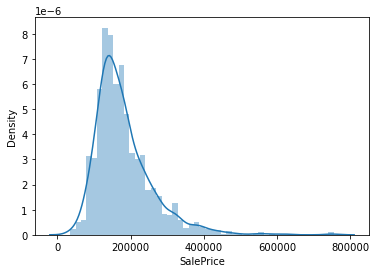

In [21]:
sns.distplot(data['SalePrice'])

<AxesSubplot:>

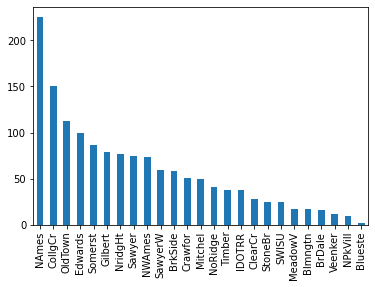

In [22]:
data["Neighborhood"].value_counts().plot(kind='bar')

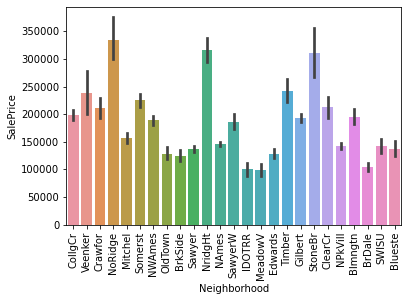

In [23]:
sns.barplot(x=data["Neighborhood"],y=data["SalePrice"])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

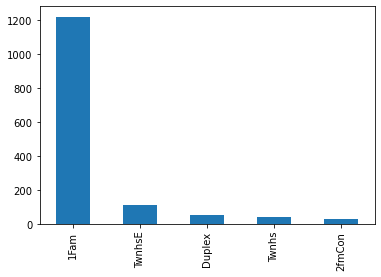

In [24]:
data["BldgType"].value_counts().plot(kind='bar')

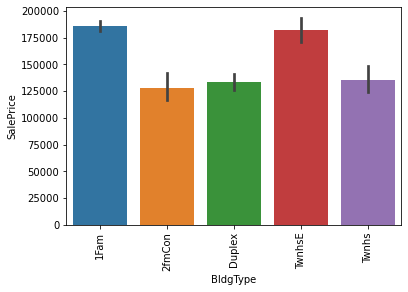

In [25]:
sns.barplot(x=data["BldgType"],y=data["SalePrice"])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FullBath', ylabel='Density'>

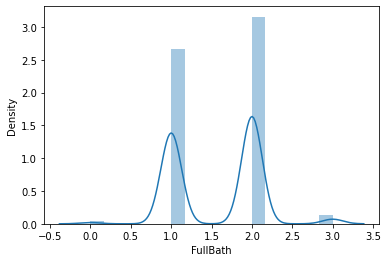

In [26]:
sns.distplot(data["FullBath"])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

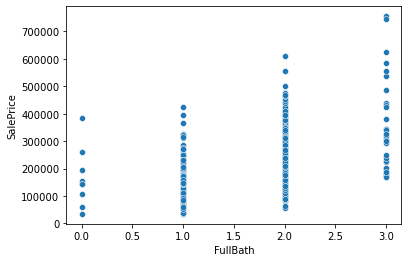

In [27]:
sns.scatterplot(x=data['FullBath'],y=data['SalePrice'])

<AxesSubplot:>

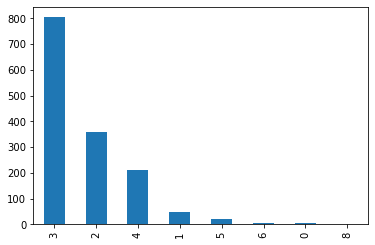

In [28]:
data['BedroomAbvGr'].value_counts().plot(kind='bar')

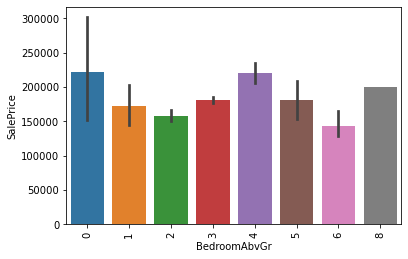

In [29]:
sns.barplot(x=data["BedroomAbvGr"],y=data["SalePrice"])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

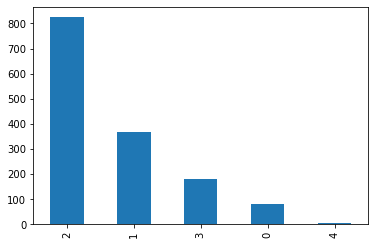

In [30]:
data['GarageCars'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

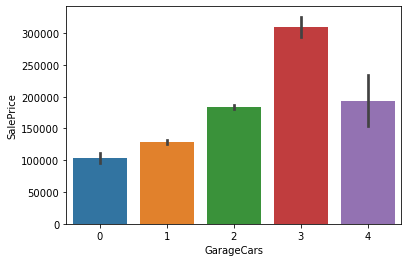

In [31]:
sns.barplot(x=data["GarageCars"],y=data["SalePrice"])

<AxesSubplot:>

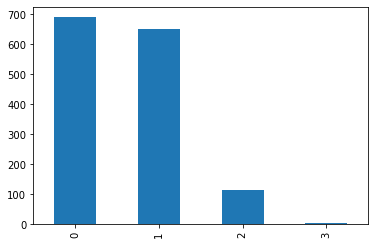

In [32]:
data['Fireplaces'].value_counts().plot(kind='bar')

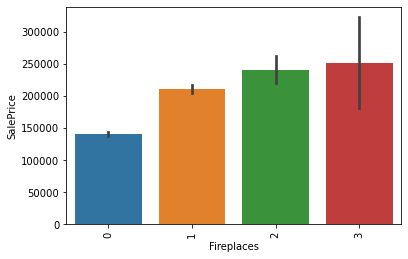

In [33]:
sns.barplot(x=data["Fireplaces"],y=data["SalePrice"])
plt.xticks(rotation='vertical')
plt.show()

In [34]:
data.corr()['SalePrice']

GrLivArea       0.708624
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageCars      0.640409
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [35]:
data.drop(columns = ["KitchenAbvGr", "BedroomAbvGr", "HalfBath"], inplace=True)
data.head()

,Neighborhood,BldgType,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice
0,CollgCr,1Fam,1710,2,8,0,2,208500
1,Veenker,1Fam,1262,2,6,1,2,181500
2,CollgCr,1Fam,1786,2,6,1,2,223500
3,Crawfor,1Fam,1717,1,7,1,3,140000
4,NoRidge,1Fam,2198,2,9,1,3,250000


<AxesSubplot:>

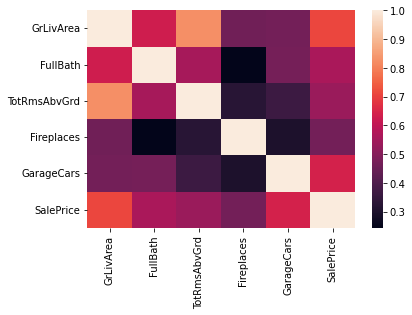

In [36]:
sns.heatmap(data.corr())

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

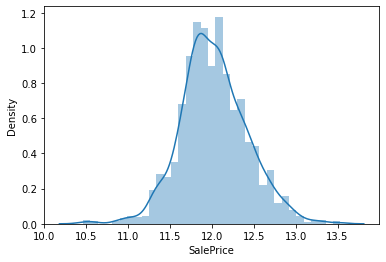

In [37]:
sns.distplot(np.log(data['SalePrice']))


In [38]:
X = data.drop(columns=['SalePrice'])
y = np.log(data['SalePrice'])

In [39]:
X

,Neighborhood,BldgType,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars
0,CollgCr,1Fam,1710,2,8,0,2
1,Veenker,1Fam,1262,2,6,1,2
2,CollgCr,1Fam,1786,2,6,1,2
3,Crawfor,1Fam,1717,1,7,1,3
4,NoRidge,1Fam,2198,2,9,1,3
...,...,...,...,...,...,...,...
1455,Gilbert,1Fam,1647,2,7,1,2
1456,NWAmes,1Fam,2073,2,7,2,2
1457,Crawfor,1Fam,2340,2,9,2,1
1458,NAmes,1Fam,1078,1,5,0,1


In [40]:
y


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [80]:
X_train

,Neighborhood,BldgType,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars
498,Sawyer,1Fam,899,1,5,0,1
690,CollgCr,TwnhsE,848,1,3,1,2
1289,NridgHt,1Fam,1970,2,8,1,3
653,IDOTRR,1Fam,1469,1,7,0,1
370,Gilbert,1Fam,1664,2,7,1,2
...,...,...,...,...,...,...,...
466,NAmes,1Fam,1277,1,5,1,2
299,Crawfor,1Fam,1152,1,6,1,1
493,NAmes,1Fam,1269,1,6,1,1
527,NridgHt,1Fam,2713,2,11,1,3


In [81]:
print(X_train.shape)
print(X_test.shape)

(1241, 7)
(219, 7)


### Line Regression


In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred0 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8302018580914078
MAE 0.12700636655669809


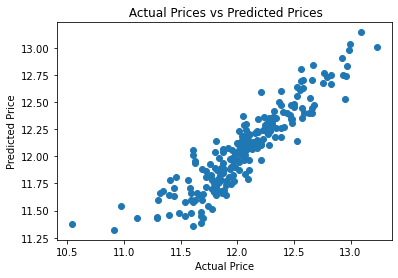

In [113]:
plt.scatter(y_test, y_pred0)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Ridge Regression

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = Ridge(alpha=1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred1 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8302018580914078
MAE 0.12700636655669809


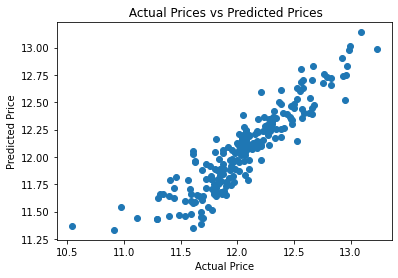

In [85]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Lasso Regression


In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = Lasso(alpha=0.0001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred2 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8302018580914078
MAE 0.12700636655669809


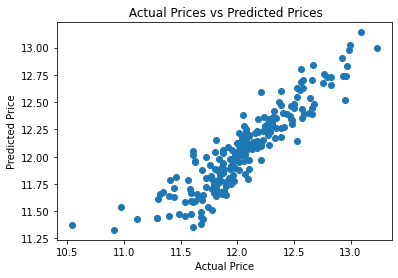

In [87]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### KNN

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=4)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred3 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5232273786273764
MAE 0.22201069949768756


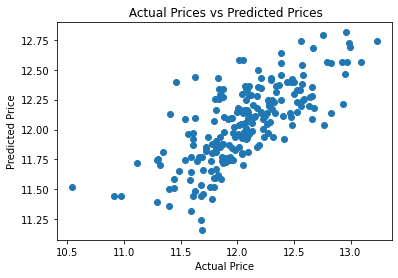

In [91]:
plt.scatter(y_test, y_pred3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Decision Tree

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=6)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred4 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred4))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7147623006213439
MAE 0.22201069949768756


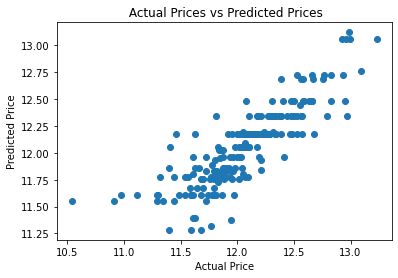

In [93]:
plt.scatter(y_test, y_pred4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Random Forest

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=13)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred5 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred5))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8061790912672799
MAE 0.22201069949768756


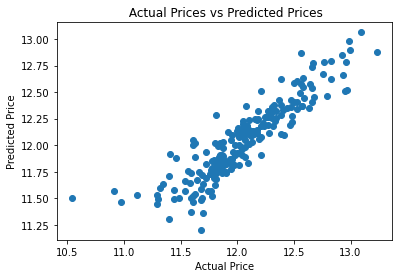

In [95]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### AdaBoost

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=13,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred6 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred6))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6836221732180094
MAE 0.22201069949768756


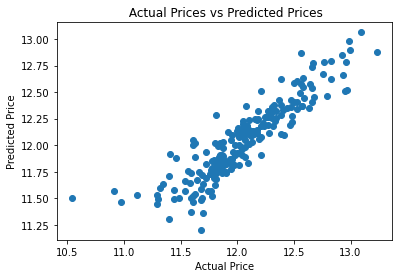

In [97]:
plt.scatter(y_test, y_pred5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Gradient Boost


In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=213, min_samples_split = 2, max_depth = 5, learning_rate = 0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred6 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred6))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.823955537445791
MAE 0.22201069949768756


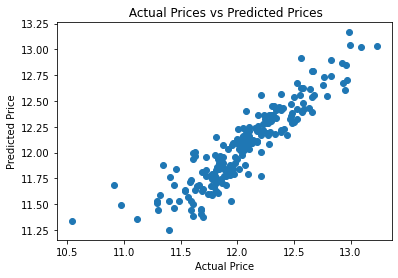

In [99]:
plt.scatter(y_test, y_pred6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### SVM

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = SVR(kernel='rbf', gamma= 0.001, C= 100 , shrinking=True, cache_size=200, tol=0.001, max_iter=-1, epsilon= 0.01)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred7 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred7))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6534496018857676
MAE 0.22201069949768756


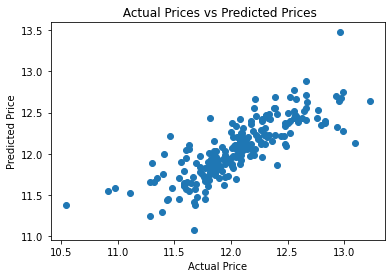

In [101]:
plt.scatter(y_test, y_pred7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Voting Regression

In [102]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')


lr = LinearRegression()
gbdt = GradientBoostingRegressor(n_estimators=213,max_features=0.5)
rd = Ridge(alpha=0)
lso = Lasso(alpha=0.001)

step2 = VotingRegressor([('lr', lr), ('gbdt', gbdt), ('rd',rd), ('lso',lso)],weights=[12,9,5,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred8 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred8))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8340812579756901
MAE 0.22201069949768756


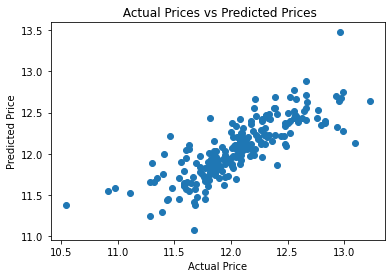

In [103]:
plt.scatter(y_test, y_pred7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Stacking Regression


In [104]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1])
],remainder='passthrough')


estimators = [
    ('lr', LinearRegression()),
    ('gbdt',GradientBoostingRegressor(n_estimators=213,max_features=0.5, max_depth = 5, min_samples_split = 3,
          learning_rate = 0.1)),
    ('rd', Ridge(alpha=0))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Lasso(alpha=0.001))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred8 = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred8))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8454251805451579
MAE 0.22201069949768756


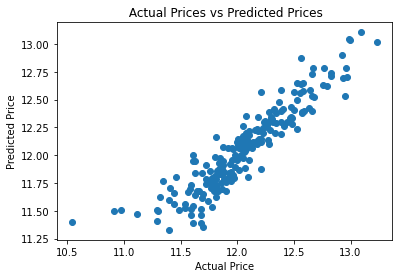

In [105]:
plt.scatter(y_test, y_pred8)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [57]:
X.columns

Index(['Neighborhood', 'BldgType', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars'],
      dtype='object')

In [106]:
import pickle

pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [107]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['CollgCr','1Fam', 1710, 2, 8, 0, 2]).reshape(1,7)))

array([12.22486138])

In [108]:
pipe.predict(pd.DataFrame([['CollgCr','1Fam', 1710, 2, 8, 2, 2]], columns=['Neighborhood', 'BldgType', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars']))

array([12.27456056])

In [109]:
data

,Neighborhood,BldgType,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice
0,CollgCr,1Fam,1710,2,8,0,2,208500
1,Veenker,1Fam,1262,2,6,1,2,181500
2,CollgCr,1Fam,1786,2,6,1,2,223500
3,Crawfor,1Fam,1717,1,7,1,3,140000
4,NoRidge,1Fam,2198,2,9,1,3,250000
...,...,...,...,...,...,...,...,...
1455,Gilbert,1Fam,1647,2,7,1,2,175000
1456,NWAmes,1Fam,2073,2,7,2,2,210000
1457,Crawfor,1Fam,2340,2,9,2,1,266500
1458,NAmes,1Fam,1078,1,5,0,1,142125


In [110]:
X_train

,Neighborhood,BldgType,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars
498,Sawyer,1Fam,899,1,5,0,1
690,CollgCr,TwnhsE,848,1,3,1,2
1289,NridgHt,1Fam,1970,2,8,1,3
653,IDOTRR,1Fam,1469,1,7,0,1
370,Gilbert,1Fam,1664,2,7,1,2
...,...,...,...,...,...,...,...
466,NAmes,1Fam,1277,1,5,1,2
299,Crawfor,1Fam,1152,1,6,1,1
493,NAmes,1Fam,1269,1,6,1,1
527,NridgHt,1Fam,2713,2,11,1,3
